In [2]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint
import tensorflow as tf
# Preparing the dataset
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Making a copy before flattening for the next code-segment which displays images
x_train_drawing = x_train


image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)




# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


Using TensorFlow backend.


In [7]:
model = Sequential()

model.add(Dense(units=16, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=12, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax', input_shape=(image_size,)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_8 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                130       
Total params: 12,894
Trainable params: 12,894
Non-trainable params: 0
_________________________________________________________________


Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 2s 41us/step - loss: 1.5307 - acc: 0.5670 - val_loss: 0.8969 - val_acc: 0.7903
Epoch 2/5
54000/54000 [==============================] - 2s 34us/step - loss: 0.7592 - acc: 0.7934 - val_loss: 0.5674 - val_acc: 0.8547
Epoch 3/5
54000/54000 [==============================] - 2s 33us/step - loss: 0.6215 - acc: 0.8137 - val_loss: 0.5314 - val_acc: 0.8480
Epoch 4/5
54000/54000 [==============================] - 2s 30us/step - loss: 0.5729 - acc: 0.8242 - val_loss: 0.4836 - val_acc: 0.8598
Epoch 5/5
54000/54000 [==============================] - 2s 30us/step - loss: 0.5605 - acc: 0.8294 - val_loss: 0.4453 - val_acc: 0.8685


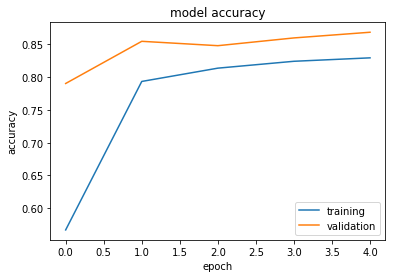

Test loss: 0.499
Test accuracy: 0.845


In [8]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])
history = model.fit(x=x_train, y=y_train, epochs=5, verbose=1, validation_split=.1)

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)



plt.plot(history.history["acc"])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [13]:
print(model.evaluate(x_test, y_test))

10000/10000 [==============================] - 0s 11us/step
[0.49854602358341216, 0.8445]


In [1]:
tf.keras.models.save_model("NN.model", filepath=r"C:\Users\dimet\Desktop\NN")

NameError: name 'tf' is not defined